# LOGISTIC REGRESSION

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings

warnings.filterwarnings("ignore")

In [39]:
titanic_data=pd.read_csv('C:\Users\Admin\Desktop\Untitled Folder\\train.csv')

In [15]:
titanic_data.head(3)

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,male,0


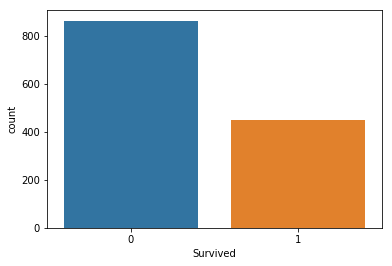

In [16]:
# compare passengers who survived and didn't suvive

sns.countplot(x="Survived",data=titanic_data)

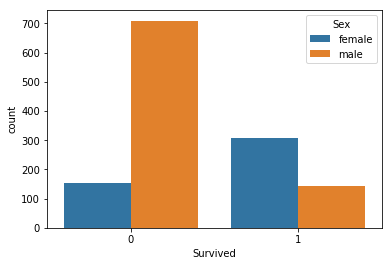

In [20]:
sns.countplot(x="Survived",hue="Sex",data=titanic_data)

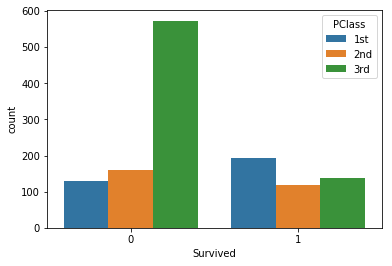

In [22]:
sns.countplot(x="Survived",hue="PClass",data=titanic_data)

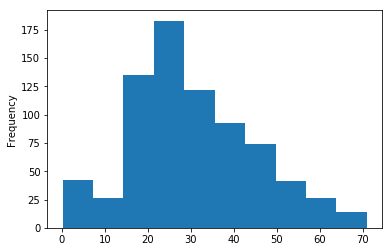

In [23]:
titanic_data["Age"].plot.hist()

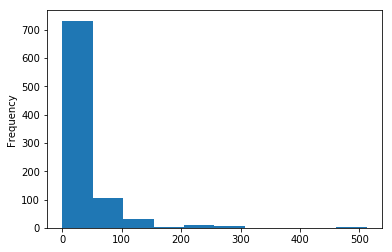

In [40]:
titanic_data["Fare"].plot.hist()

# Checking null values

In [41]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [44]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [43]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [45]:
titanic_data.dropna(inplace=True)

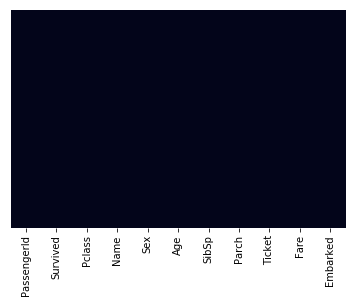

In [48]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

In [49]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Convert string values into categorical values

In [52]:
gender=pd.get_dummies(titanic_data['Sex'], drop_first=True)

In [53]:
gender.head(4)

,male
0,1
1,0
2,0
3,0


In [54]:
journey_start=pd.get_dummies(titanic_data['Embarked'], drop_first=True)
journey_start.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


In [55]:
Pcl=pd.get_dummies(titanic_data['Pclass'], drop_first=True)
Pcl.head(3)

,2,3
0,0,1
1,0,0
2,0,1


# Concatinate new categorical values to dataset

In [58]:
titanic_data=pd.concat([titanic_data,gender,journey_start,Pcl],axis=1)
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,male,Q,S,2,3,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,1,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,1,0,0,1,0,1


In [59]:
titanic_data.drop(['Sex','PassengerId','Name','Ticket','Embarked'], axis=1, inplace=True)
titanic_data.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1,0,0,1,0,1


In [60]:
titanic_data.drop(['Pclass'], axis=1, inplace=True)
titanic_data.head(3)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1,0,0,1,0,1


# Training and Testing the dataset

In [61]:
# these are the features or independent variables as drop survived column
X=titanic_data.drop('Survived',axis=1)

# this is the dependent variable
y=titanic_data['Survived']

# Split data into training and tesing subset

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.3, random_state=5)

In [74]:
from sklearn.linear_model import LogisticRegression

logistic=LogisticRegression(solver='lbfgs')
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [76]:
# Making predictions on the test data

prediction=logistic.predict(X_test)

from sklearn.metrics import classification_report
classification_report(y_test,prediction)

u'              precision    recall  f1-score   support\n\n           0       0.84      0.88      0.86       136\n           1       0.77      0.71      0.74        78\n\n   micro avg       0.82      0.82      0.82       214\n   macro avg       0.81      0.79      0.80       214\nweighted avg       0.82      0.82      0.82       214\n'

In [80]:
# checking the accuracy of the test

from sklearn.metrics import accuracy_score

accuracy_score(y_test, prediction)

0.8177570093457944